## Question 3

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the database
df = pd.read_csv("data.csv", index_col=0)
df.head(5)

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
dmp923122274,0,0,2,0,0,3,6,0,0,0,...,0,0,0,4,0,0,1,0,1,0
dmp458034174,0,3,0,0,0,0,1,0,0,0,...,0,0,0,12,0,2,2,12,0,0
dmp364043571,0,2,0,0,0,0,0,0,2,0,...,0,0,0,11,0,0,0,0,0,0
dmp461339655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
dmp549691332,0,0,0,0,0,5,7,0,0,5,...,0,0,1,0,0,0,1,0,0,0


In [3]:
df.info()
#Diigo: object 

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, dmp923122274 to dmp521609268
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Addthis        10000 non-null  int64 
 1   Bebo           10000 non-null  int64 
 2   Blogcatalog    10000 non-null  int64 
 3   Blogger        10000 non-null  int64 
 4   Buddymedia     10000 non-null  int64 
 5   Cnet           10000 non-null  int64 
 6   Conduit        10000 non-null  int64 
 7   Customerlobby  10000 non-null  int64 
 8   Delicious      10000 non-null  int64 
 9   Digg           10000 non-null  int64 
 10  Diigo          10000 non-null  object
 11  Docs           10000 non-null  int64 
 12  Docstoc        10000 non-null  int64 
 13  Download       10000 non-null  int64 
 14  Dropbox        10000 non-null  int64 
 15  Drupal         10000 non-null  int64 
 16  Epinions       10000 non-null  int64 
 17  Evernote       10000 non-null  int64 
 18  Facebook     

In [4]:
df["Diigo"].value_counts()

0                         8842
Error: value not found     642
1                          332
2                          183
3                            1
Name: Diigo, dtype: int64

In [5]:
# replace errors with NaN
df.loc[df["Diigo"]=="Error: value not found","Diigo"] = np.nan

In [6]:
#convert type
df["Diigo"] = df["Diigo"].astype("float64")

In [7]:
#Exploring data 
df.describe()

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.42250,0.78130,0.568100,2.823700,0.0,1.950400,2.142100,0.000200,0.393100,1.012700,...,0.41190,0.040200,0.293600,2.176900,0.459500,0.602200,0.380800,6.040600,0.206600,0.123400
std,1.01405,1.48899,1.197709,5.571438,0.0,2.937619,3.293993,0.014141,0.811319,2.266021,...,1.00436,0.196438,0.612402,3.691879,0.982169,1.194696,0.755413,7.892679,0.588856,0.328912
min,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,1.00000,0.000000,0.000000,0.0,4.000000,4.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
max,6.00000,8.00000,7.000000,28.000000,0.0,15.000000,16.000000,1.000000,4.000000,13.000000,...,7.00000,1.000000,3.000000,19.000000,5.000000,7.000000,4.000000,36.000000,4.000000,1.000000


In [8]:
for column in df:
    if df[column].apply(type).eq(str).any():
        print("The" , column, "contains strings")
    if df[column].any() < 0:
        print("The" , column, "contains negative values.")

In [9]:
#check for outliers below 0 and above 1000 clicks

outliers = []

for c in df.columns:
    if df[c].max()>=1000:
        outliers.append(c)
        outliers.append("max: " + str(df[c].max()))
    if df[c].min()<0:
        outliers.append(c)
        outliers.append("min: " + str(df[c].min()))

print(outliers)

['Newsvine', 'max: 96372367637']


In [10]:
#replace outlier
df.loc[df["Newsvine"]==df["Newsvine"].max(),"Newsvine"] = np.nan
print(df["Newsvine"].max())

3.0


In [11]:
df.isna().sum()

Addthis        0
Bebo           0
Blogcatalog    0
Blogger        0
Buddymedia     0
              ..
Yelp           0
Yfrog          0
Youtube        0
Yuku           0
Click          0
Length: 82, dtype: int64

In [12]:
nan_col = {}
for c in df.columns:
    if df[c].isna().sum()>0:
        nan_col[c]=df[c].isna().sum()
nan_col

{'Diigo': 642, 'Newsvine': 1}

In [13]:
df = df.drop("Diigo", axis=1)
df = df.dropna()

In [14]:
#Exploring if another value is different to numbers in the Data. 
result = df.applymap(np.isreal)
result.head(10)

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
dmp923122274,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
dmp458034174,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
dmp364043571,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
dmp461339655,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
dmp549691332,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
dmp526137646,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
dmp229602119,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
dmp432025886,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
dmp978420782,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
dmp319040990,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [15]:
#Checking the datatypes
df.dtypes

Addthis        int64
Bebo           int64
Blogcatalog    int64
Blogger        int64
Buddymedia     int64
               ...  
Yelp           int64
Yfrog          int64
Youtube        int64
Yuku           int64
Click          int64
Length: 81, dtype: object

In [16]:
#Checking point
df.head()

,Addthis,Bebo,Blogcatalog,Blogger,Buddymedia,Cnet,Conduit,Customerlobby,Delicious,Digg,...,Vimeo,Vocus,Wetpaint,Wordpress,Xanga,Yelp,Yfrog,Youtube,Yuku,Click
dmp923122274,0,0,2,0,0,3,6,0,0,0,...,0,0,0,4,0,0,1,0,1,0
dmp458034174,0,3,0,0,0,0,1,0,0,0,...,0,0,0,12,0,2,2,12,0,0
dmp364043571,0,2,0,0,0,0,0,0,2,0,...,0,0,0,11,0,0,0,0,0,0
dmp461339655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,22,0,0
dmp549691332,0,0,0,0,0,5,7,0,0,5,...,0,0,1,0,0,0,1,0,0,0


12.34

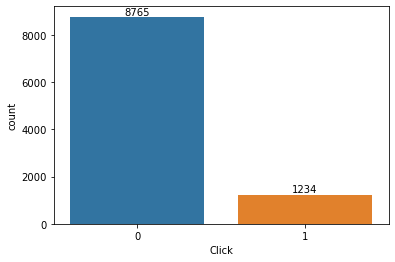

In [17]:
#Insights of the data.
ax = sns.countplot(x ='Click', data = df)
abs_values = df['Click'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

round(df["Click"].sum()/df["Click"].count() * 100, 2)

In [22]:
#Selecting the columns for features X and target Y
y = df['Click']
X = df.drop("Click", axis=1)

In [23]:
#Creating a Train set (80%) and Test set (20%)
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

### Implement SVM Model

In [24]:
# Scaling
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [29]:
param_grid = {"C": [0.1, 1, 10, 100, 1000],  
              "gamma": [1, 0.1, 0.01, 0.001, 0.0001], 
              "kernel": ["rbf"]} 

In [31]:
#SVM model classification
svm_model = SVC()

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Model Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, zero_division= 1))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Model Performance:
Confusion Matrix:
[[1747   23]
 [  58  172]]
Precision: 0.882051282051282
Recall: 0.7478260869565218
F1 Score: 0.8094117647058823
Accuracy: 0.9595


In [32]:
grid_svm = GridSearchCV(estimator=svm_model, 
                        param_grid=param_grid, 
                        refit=True, verbose=3, 
                        cv=5, 
                        return_train_score=True)

In [34]:
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.875, test=0.874) total time=   5.9s
[CV 2/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.875, test=0.874) total time=   5.5s
[CV 3/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.875, test=0.874) total time=   5.4s
[CV 4/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.875, test=0.874) total time=   5.0s
[CV 5/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=0.874, test=0.875) total time=   5.6s
[CV 1/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.875, test=0.874) total time=   5.2s
[CV 2/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.875, test=0.874) total time=   5.4s
[CV 3/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.875, test=0.874) total time=   5.4s
[CV 4/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.875, test=0.874) total time=   5.1s
[CV 5/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.874, test=0.875) total time=   5.5

[CV 2/5] END C=100, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.959) total time=   1.7s
[CV 3/5] END C=100, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.958) total time=   1.2s
[CV 4/5] END C=100, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.959) total time=   1.3s
[CV 5/5] END C=100, gamma=0.01, kernel=rbf;, score=(train=1.000, test=0.966) total time=   1.4s
[CV 1/5] END C=100, gamma=0.001, kernel=rbf;, score=(train=0.998, test=0.971) total time=   0.6s
[CV 2/5] END C=100, gamma=0.001, kernel=rbf;, score=(train=0.998, test=0.975) total time=   0.9s
[CV 3/5] END C=100, gamma=0.001, kernel=rbf;, score=(train=0.998, test=0.966) total time=   0.8s
[CV 4/5] END C=100, gamma=0.001, kernel=rbf;, score=(train=0.999, test=0.969) total time=   0.8s
[CV 5/5] END C=100, gamma=0.001, kernel=rbf;, score=(train=0.998, test=0.969) total time=   0.7s
[CV 1/5] END C=100, gamma=0.0001, kernel=rbf;, score=(train=0.977, test=0.974) total time=   0.8s
[CV 2/5] END C=100, gamma=0.0001,

In [48]:
print(grid_svm.best_params_)  
# print model after tuning
print(grid_svm.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [49]:
grid_predictions = grid_svm.predict(X_train)

In [50]:
print("Confusion matrix: \n",
      confusion_matrix(y_train, grid_predictions), "\n")

This is the confusion matrix 
 [[6938   57]
 [  74  930]] 



In [51]:
print(classification_report(y_train, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6995
           1       0.94      0.93      0.93      1004

    accuracy                           0.98      7999
   macro avg       0.97      0.96      0.96      7999
weighted avg       0.98      0.98      0.98      7999



In [52]:
grid_predictions = grid_svm.predict(X_test)

In [54]:
print("This is the confusion matrix \n",
      confusion_matrix(y_test, grid_predictions), "\n")

This is the confusion matrix 
 [[1742   28]
 [  21  209]] 



In [55]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1770
           1       0.88      0.91      0.90       230

    accuracy                           0.98      2000
   macro avg       0.93      0.95      0.94      2000
weighted avg       0.98      0.98      0.98      2000



### Implement random Forest

In [57]:
param_grid = {"n_estimators": [300, 500, 1000],
              "max_depth": [1, 3, 5, 10],
              "min_samples_split": [2, 4, 6, 8]}

In [60]:
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Model Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Model Performance:
Confusion Matrix:
[[1770    0]
 [ 229    1]]
Precision: 1.0
Recall: 0.004347826086956522
F1 Score: 0.008658008658008658
Accuracy: 0.8855


In [61]:
grid_rf = GridSearchCV(estimator=rf_model, 
                       param_grid=param_grid, 
                       refit=True, verbose=3, 
                       cv=5,
                       return_train_score=True)

In [62]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=1, min_samples_split=2, n_estimators=300;, score=(train=0.833, test=0.824) total time=   1.1s
[CV 2/5] END max_depth=1, min_samples_split=2, n_estimators=300;, score=(train=0.836, test=0.818) total time=   1.1s
[CV 3/5] END max_depth=1, min_samples_split=2, n_estimators=300;, score=(train=0.823, test=0.814) total time=   1.0s
[CV 4/5] END max_depth=1, min_samples_split=2, n_estimators=300;, score=(train=0.825, test=0.821) total time=   0.9s
[CV 5/5] END max_depth=1, min_samples_split=2, n_estimators=300;, score=(train=0.832, test=0.833) total time=   0.8s
[CV 1/5] END max_depth=1, min_samples_split=2, n_estimators=500;, score=(train=0.833, test=0.817) total time=   1.4s
[CV 2/5] END max_depth=1, min_samples_split=2, n_estimators=500;, score=(train=0.837, test=0.821) total time=   1.3s
[CV 3/5] END max_depth=1, min_samples_split=2, n_estimators=500;, score=(train=0.830, test=0.821) total time=   1.4s
[C

[CV 1/5] END max_depth=3, min_samples_split=2, n_estimators=1000;, score=(train=0.856, test=0.842) total time=   3.8s
[CV 2/5] END max_depth=3, min_samples_split=2, n_estimators=1000;, score=(train=0.855, test=0.836) total time=   3.9s
[CV 3/5] END max_depth=3, min_samples_split=2, n_estimators=1000;, score=(train=0.851, test=0.832) total time=   4.1s
[CV 4/5] END max_depth=3, min_samples_split=2, n_estimators=1000;, score=(train=0.853, test=0.838) total time=   3.8s
[CV 5/5] END max_depth=3, min_samples_split=2, n_estimators=1000;, score=(train=0.859, test=0.847) total time=   3.9s
[CV 1/5] END max_depth=3, min_samples_split=4, n_estimators=300;, score=(train=0.856, test=0.839) total time=   1.0s
[CV 2/5] END max_depth=3, min_samples_split=4, n_estimators=300;, score=(train=0.857, test=0.836) total time=   1.2s
[CV 3/5] END max_depth=3, min_samples_split=4, n_estimators=300;, score=(train=0.846, test=0.828) total time=   1.3s
[CV 4/5] END max_depth=3, min_samples_split=4, n_estimators

[CV 1/5] END max_depth=5, min_samples_split=4, n_estimators=500;, score=(train=0.896, test=0.863) total time=   2.4s
[CV 2/5] END max_depth=5, min_samples_split=4, n_estimators=500;, score=(train=0.902, test=0.861) total time=   2.7s
[CV 3/5] END max_depth=5, min_samples_split=4, n_estimators=500;, score=(train=0.899, test=0.867) total time=   2.3s
[CV 4/5] END max_depth=5, min_samples_split=4, n_estimators=500;, score=(train=0.899, test=0.865) total time=   2.6s
[CV 5/5] END max_depth=5, min_samples_split=4, n_estimators=500;, score=(train=0.908, test=0.877) total time=   2.5s
[CV 1/5] END max_depth=5, min_samples_split=4, n_estimators=1000;, score=(train=0.900, test=0.865) total time=   5.3s
[CV 2/5] END max_depth=5, min_samples_split=4, n_estimators=1000;, score=(train=0.899, test=0.866) total time=   5.0s
[CV 3/5] END max_depth=5, min_samples_split=4, n_estimators=1000;, score=(train=0.898, test=0.868) total time=   5.2s
[CV 4/5] END max_depth=5, min_samples_split=4, n_estimators=1

[CV 1/5] END max_depth=10, min_samples_split=6, n_estimators=300;, score=(train=0.998, test=0.886) total time=   2.7s
[CV 2/5] END max_depth=10, min_samples_split=6, n_estimators=300;, score=(train=0.999, test=0.887) total time=   2.5s
[CV 3/5] END max_depth=10, min_samples_split=6, n_estimators=300;, score=(train=0.997, test=0.884) total time=   2.4s
[CV 4/5] END max_depth=10, min_samples_split=6, n_estimators=300;, score=(train=0.999, test=0.885) total time=   2.5s
[CV 5/5] END max_depth=10, min_samples_split=6, n_estimators=300;, score=(train=0.998, test=0.888) total time=   2.7s
[CV 1/5] END max_depth=10, min_samples_split=6, n_estimators=500;, score=(train=0.998, test=0.886) total time=   3.8s
[CV 2/5] END max_depth=10, min_samples_split=6, n_estimators=500;, score=(train=0.999, test=0.886) total time=   3.6s
[CV 3/5] END max_depth=10, min_samples_split=6, n_estimators=500;, score=(train=0.998, test=0.882) total time=58.9min
[CV 4/5] END max_depth=10, min_samples_split=6, n_estima

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [1, 3, 5, 10],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [300, 500, 1000]},
             return_train_score=True, verbose=3)

In [63]:
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

{'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 300}
RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=8, n_estimators=300, random_state=42)


In [64]:
grid_predictions = grid_svm.predict(X_train)

In [65]:
print("Confusion matrix: \n",
      confusion_matrix(y_train, grid_predictions), "\n")

Confusion matrix: 
 [[6938   57]
 [  74  930]] 



In [66]:
print(classification_report(y_train, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6995
           1       0.94      0.93      0.93      1004

    accuracy                           0.98      7999
   macro avg       0.97      0.96      0.96      7999
weighted avg       0.98      0.98      0.98      7999



In [67]:
grid_predictions = grid_svm.predict(X_test)

In [68]:
print("Confusion matrix: \n",
      confusion_matrix(y_test, grid_predictions), "\n")

Confusion matrix: 
 [[1742   28]
 [  21  209]] 



In [69]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1770
           1       0.88      0.91      0.90       230

    accuracy                           0.98      2000
   macro avg       0.93      0.95      0.94      2000
weighted avg       0.98      0.98      0.98      2000



### Cross-validation

In [71]:
# Cross-validation
sv_cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("\nSupport Vector Machine Model Cross-Validation Scores:", sv_cv_scores)
print("Mean Cross-Validation Score:", sv_cv_scores.mean())

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nRandom Forest Model Cross-Validation Scores:", rf_cv_scores)
print("Mean Cross-Validation Score:", rf_cv_scores.mean())


Support Vector Machine Model Cross-Validation Scores: [0.9095     0.916      0.909      0.911      0.91045523]
Mean Cross-Validation Score: 0.9111910455227614

Random Forest Model Cross-Validation Scores: [0.8765     0.8765     0.8765     0.8765     0.87693847]
Mean Cross-Validation Score: 0.8765876938469234


Random forest prediction feature_importances

In [74]:
def important_features(original_dataframe, rf_model):

    temp1 = []
    temp2 = []

    for name, score in zip(original_dataframe.columns, rf_model.best_estimator_.feature_importances_):
        temp1.append(name)
        temp2.append(score)

    dic = {"feature" : temp1, "importance" : temp2}

    feature_importance = pd.DataFrame(dic).set_index("feature")
    feature_importance.sort_values(by="importance", ascending=False, inplace=True)

    print("These are the 5 most important features: \n")
    print(feature_importance[:5])

    # plot features and their relative_importance
    plt.bar(list(feature_importance.index[:5]), feature_importance["importance"][:5])
    plt.title("5 most important features")
    plt.xlabel("Marketing Channels")
    plt.ylabel("Relative Importance in %")
    plt.show()

These are the 5 most important features: 

             importance
feature                
Wordpress      0.060989
Livejournal    0.058918
Thisnext       0.055135
Blogger        0.050350
Yelp           0.046696


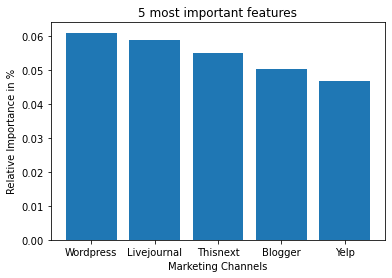

In [75]:
important_features(df, grid_rf)

We would recommend them to use Wordpress and Livejournal.

To be cost efficent one should invest in the most efficent chanels from q3.